<a href="https://colab.research.google.com/github/ymuto0302/PJ2024/blob/main/GIS3_1_build_GeoDataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用(3-1)：GeoDataFrame の作り方
GeoPandas で取り扱う地理情報データは **GeoDataFrame** という形式に格納される。
これは pandas のデータフレームの拡張と位置付けられる。

**GeoDataframe を構成する基本的な部品は Point, LineString および Polygon である。**
これら以外に MultiPoint や MultiPolygon が存在するが，ここでは取り上げない。

以下では，自分で GeoDataFrame を作成することで，その仕組みを理解しよう。

---
### (準備) GeoPandas のインストール
GeoDataframe を構成する部品は **shapely.geometry** を用いて生成される。

Google Colab の場合，shapely は当初からインストールされている。

以下では GeoDataframe を管理する観点から GeoPandas をインストールする。

In [1]:
!pip install geopandas

---
## Point (点) を作る
基本的な部品である **Point (点) **を含む GeoDataFrame を作ってみる。

部品を生成するには shapely.geometry を用いる。また，点を定義する際は `shapely.geometry` から `Point` クラスをインポートしておく。

In [2]:
# 必要なライブラリのインポート
import geopandas as gpd
from shapely.geometry import Point

最初に Point を定義し，これらを GeoDataFrame のコンストラクタへ渡す。

ここで列名として "geometry" を指定する必要がある。

１個の点のみを GeoDataFrame とするためには
```
gpd.GeoDataFrame([point1], columns=['geometry'])
```
とする。

In [3]:
# Point(点)の定義
point1 = Point(10, 10)

# 点を GeoDataFrame の grometry 列へ格納
point = gpd.GeoDataFrame([point1], columns=['geometry'])

# 変数 point の中身を確認
point

,geometry
0,POINT (10.00000 10.00000)


一方，複数の点を同時に GeoDataFrame に格納するためには，次のようにリスト内に Point データを列挙すればよい。
```
gpd.GeoDataFrame([point1, point2, point3], columns=['geometry'])
```

In [4]:
# Point(点)の定義
point1 = Point(10, 10)
point2 = Point(20, 20)
point3 = Point(10, 20)

# 点を GeoDataFrame の grometry 列へ格納
points = gpd.GeoDataFrame([point1, point2, point3], columns=['geometry'])

# 変数 points の中身を確認
points

,geometry
0,POINT (10.00000 10.00000)
1,POINT (20.00000 20.00000)
2,POINT (10.00000 20.00000)


上で定義した変数 points が想定したデータ型となっているか，確認してみよう。

次のとおり，points は GeoDataframe 型であり，個々のフィールドは `Point` 型である。

In [5]:
# 定義された GeoDataframe の型を確認
print(type(points))
print(type(points['geometry'][0]))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.point.Point'>


生成した GeoDataframe を可視化するには plot() メソッドを用いる。

定義した３つの geometry (=点)が描画されていることが分かるだろう。

<Axes: >

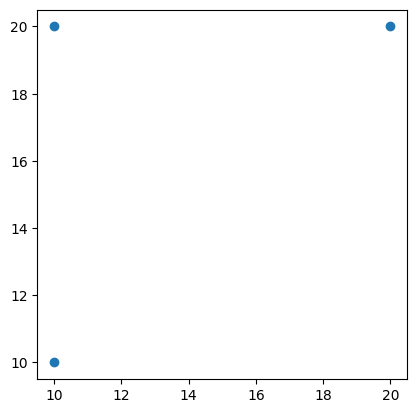

In [6]:
# 可視化：座標 (10, 10), (20, 20), (10, 20)' に点が位置することが分かる
points.plot()

---
## Polygon (多角形) を作る
Polygon (多角形) はその頂点の並びとして定義される。

ポリゴンを定義する際は shapely.geometry から **Polygon クラス**をインポートしておく。

In [7]:
# 必要なライブラリのインポート
import geopandas as gpd
from shapely.geometry import Polygon

ポリゴンを生成する場合，境界線を結ぶ形で座標を並べ，その座標列のリストを `Polygon()` へ渡せばよい。

In [8]:
# ポリゴンを作る場合，境界線を結ぶ順番に座標を並べる
cordinates = [(12, 12), (18, 12), (18, 18), (12, 18)]

# ポリゴンを GeoDataFrame の grometry 列へ格納
polygon = gpd.GeoDataFrame([Polygon(cordinates)], columns=['geometry'])

# 変数 polygon の中身を確認
polygon

,geometry
0,"POLYGON ((12.00000 12.00000, 18.00000 12.00000..."


生成した GeoDataframe の可視化には plot() メソッドを用いる。

<Axes: >

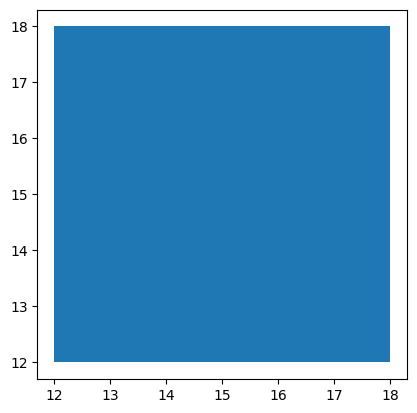

In [9]:
# 可視化
polygon.plot()

ちなみに，ポリゴンの頂点の並びを変えてみると，思いがけない形状となる。
一般にポリゴンは領域を表現するため，座標の並び順に注意が必要である。

<Axes: >

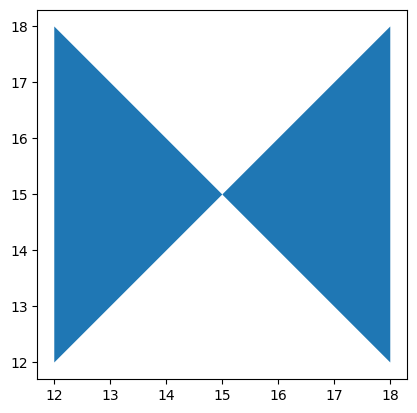

In [10]:
# 適当に座標を並べた例
cordinates = [(12, 12), (12, 18), (18, 12), (18, 18)]

# ポリゴンを GeoDataFrame の grometry 列へ格納
funny_polygon = gpd.GeoDataFrame([Polygon(cordinates)], columns=['geometry'])

funny_polygon.plot()

---
## 生成した GeoDataFrame を shapefile として保存 & 読み込み

### (準備) Google Drive のマウント
保存先を確保するため，予め Google Drive をマウントする。

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


作成した GeoDataframe を shape file へ保存するには，GeoDataframe に対して `to_file()` メソッドを発行する。

In [12]:
# GeoData を shape file として保存
path = r'/content/drive/My Drive/output.shp'
polygon.to_file(path)

shape file からの GeoDataFrame を読み込むには（従前どおり）`geopandas.read_file()` を用いる。

<Axes: >

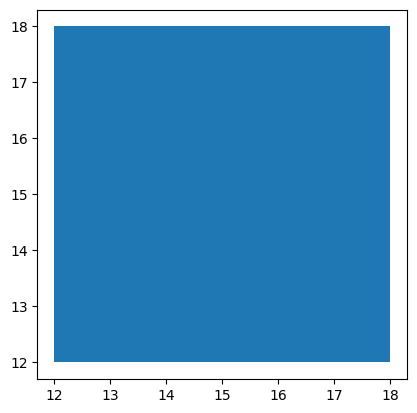

In [13]:
# shape file を読み込んで表示する
path = r'/content/drive/My Drive/output.shp'
data = gpd.read_file(path)
data.plot()

---
## GeoDataFrame に関するいくつかの操作
以下のコンテンツのうち，「ポリゴンの中心を求める操作」は特に重要である。

### 点(Point)とポリゴン(Polygon)を重ねて表示
上記で定義した Point と Polygon を重ねて表示するには，ax (artist) を用いる。

<Axes: >

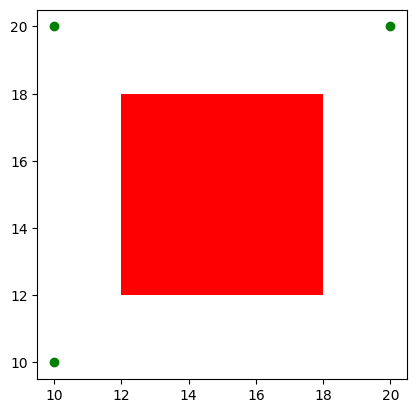

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
points.plot(ax=ax, color='green')
polygon.plot(ax=ax, color='red')

### ポリゴンの面積と中心を求める
ポリゴンの面積を求めるには `area` 属性を，中心点を求めるには `centroid` 属性を指定する。

面積：[36.]
0    POINT (15.00000 15.00000)
dtype: geometry
中心：[15.], [15.]


<Axes: >

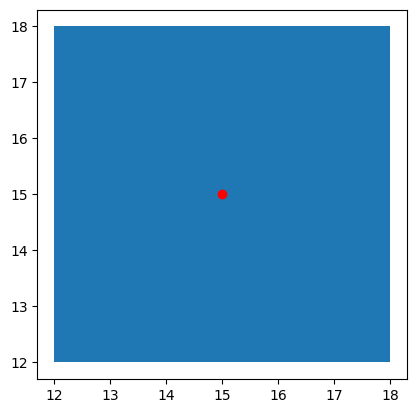

In [15]:
# ポリゴンの面積
area = polygon.area
print("面積：{}".format(area.values))

# ポリゴンの中心
center = polygon.centroid
print(center)
x, y = center.x, center.y
print("中心：{}, {}".format(x.values, y.values))

# 正しく中心が得られたか確認するため，描画する
fig, ax = plt.subplots(1)
polygon.plot(ax=ax)
polygon.centroid.plot(ax=ax, color='red')

### Point 間の距離を測る

In [16]:
# ２つの点の座標を確認
print(point1)
print(point2)

# 2点間の距離を求める
d = point1.distance(point2)
print("2点間の距離：{}".format(d))

POINT (10 10)
POINT (20 20)
2点間の距離：14.142135623730951
